No. files: 36


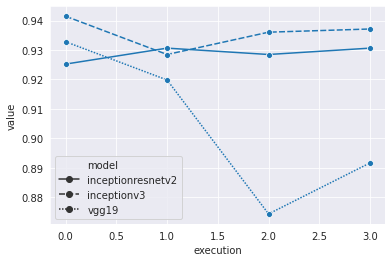

In [2]:
import os
import pandas as pd
import re
import plotly.express as px
import seaborn as sns

PATH = "results/with_history_ceil/"
summary_files = [each for each in os.listdir(PATH) if each.endswith('_summary_acc.csv')]

print("No. files: %d" % len(summary_files))

df = pd.concat((pd.read_csv(os.path.join(PATH, f)).assign(model = re.search('[0-9]_+(.+?)_summary_acc.csv', f).group(1).split("_")[0]).assign(set = re.search('[0-9]_+(.+?)_summary_acc.csv', f).group(1).split("_")[1]) for f in summary_files))

df['execution'] = df.groupby(['model', 'set']).cumcount()

df_melt = pd.melt(df[df["set"] == "test"], id_vars=['model',  'execution'], value_vars=['accuracy'])

sns.set_style("darkgrid")
ax = sns.lineplot(x="execution", y="value", data=df_melt, estimator=None, style="model",  markers=["o", "o", "o"])

#fig = px.line(df_melt, x="execution", y="value", title='Life expectancy in Canada')
#fig.show()

